In [1]:
# Email Spam Detection using Machine Learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load dataset
data = pd.read_csv("c://Users//prana//Downloads//spam.csv", encoding='latin-1')

In [3]:
# Display first few rows
print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Clean dataset: keep only required columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [5]:
# Convert labels to binary values (spam=1, ham=0)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)


In [7]:

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [9]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [10]:

# Evaluate model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [11]:
# Test with custom input
sample = ["Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."]
sample_tfidf = vectorizer.transform(sample)
prediction = model.predict(sample_tfidf)
print("\nSample Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


Sample Prediction: Spam


In [14]:
# Basic dataset info
print("Dataset Summary:")
print(data['label'].value_counts())

Dataset Summary:
label
0    4825
1     747
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\prana\AppData\Local\Temp\ipykernel_3484\3423535936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


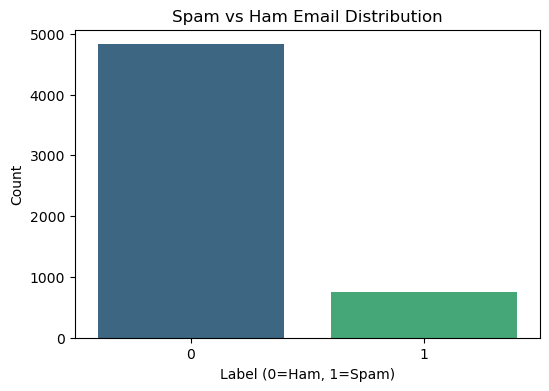

In [19]:
# 📊 Chart 1: Spam vs Ham Count
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Spam vs Ham Email Distribution')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')
plt.show()

In [20]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)

In [21]:

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
# Predictions
y_pred = model.predict(X_test_tfidf)
print(y_pred)

[0 0 0 ... 0 0 1]


In [25]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy:", round(acc * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 96.68 %

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



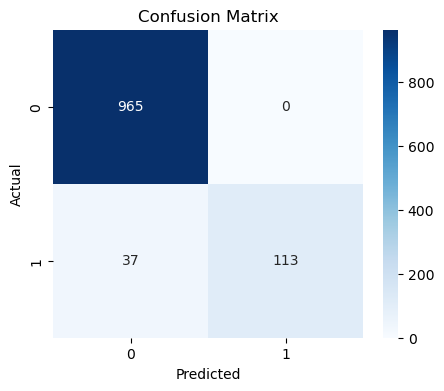

In [26]:

# 📊 Chart 2: Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# 📊 Chart 3: Top 20 Words in Spam Emails
spam_words = ' '.join(data[data['label']==1]['message']).lower().split()
spam_freq = pd.Series(spam_words).value_counts().head(20)

C:\Users\prana\AppData\Local\Temp\ipykernel_3484\3301198844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_freq.values, y=spam_freq.index, palette='rocket')


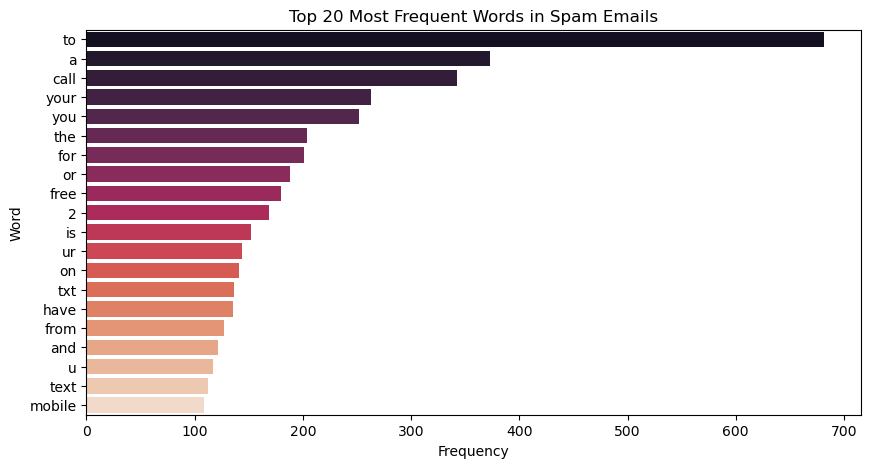

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=spam_freq.values, y=spam_freq.index, palette='rocket')
plt.title('Top 20 Most Frequent Words in Spam Emails')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [29]:

# Sample test
sample = ["Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."]
sample_tfidf = vectorizer.transform(sample)
prediction = model.predict(sample_tfidf)
print("\n📩 Sample Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


📩 Sample Prediction: Spam
